In [1]:
!pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/920.8 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np  
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Variables floues 
temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse')
#Fonctions d'appartenance triangulaires pour la température
temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])      
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30]) 
temperature['chaud'] = fuzz.trimf(temperature.universe, [27, 50, 50])     
#Fonctions d'appartenance triangulaires pour la vitesse
vitesse['faible'] = fuzz.trimf(vitesse.universe, [0, 0, 40])             
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])          
vitesse['eleve'] = fuzz.trimf(vitesse.universe, [60, 100, 100])          

#### En vous basant sur les variables floues définies précédemment, affichez leurs fonctions d’appartenance à l’aide de la méthode view()

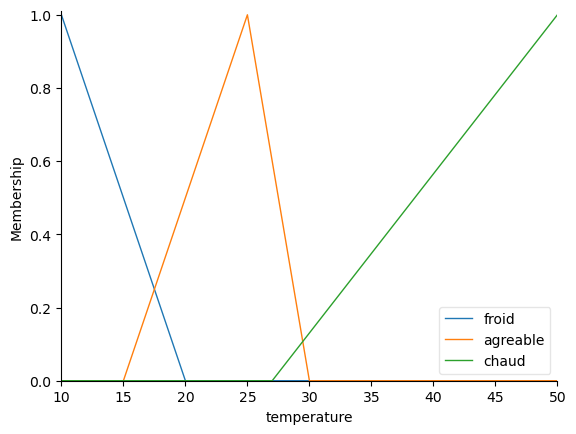

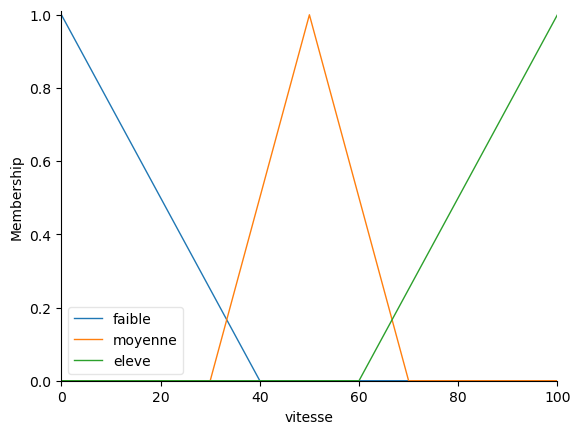

In [9]:
temperature.view()
vitesse.view()

### Règles floues

In [3]:
# Règles : si température est X alors vitesse est Y
rule1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
rule2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
rule3 = ctrl.Rule(temperature['chaud'], vitesse['eleve'])

### Calcule µ(18°)

In [5]:
import numpy as np
import skfuzzy as fuzz

x_temp = np.arange(10, 51, 1)

mu_froid = fuzz.trimf(x_temp, [10, 10, 20])
mu_agreable = fuzz.trimf(x_temp, [15, 25, 30])
mu_chaud = fuzz.trimf(x_temp, [27, 50, 50])

print("µ_froid(18)    =", fuzz.interp_membership(x_temp, mu_froid, 18))
print("µ_agreable(18) =", fuzz.interp_membership(x_temp, mu_agreable, 18))
print("µ_chaud(18)    =", fuzz.interp_membership(x_temp, mu_chaud, 18))


µ_froid(18)    = 0.2
µ_agreable(18) = 0.3
µ_chaud(18)    = 0.0


### Calcule µ(28°)

In [6]:
import numpy as np
import skfuzzy as fuzz

x_temp = np.arange(10, 51, 1)

# Fonctions d'appartenance triangulaires
mu_froid = fuzz.trimf(x_temp, [10, 10, 20])
mu_agreable = fuzz.trimf(x_temp, [15, 25, 30])
mu_chaud = fuzz.trimf(x_temp, [27, 50, 50])

# Calcul des degrés d'appartenance pour 28°C
print("µ_froid(28)    =", fuzz.interp_membership(x_temp, mu_froid, 28))
print("µ_agreable(28) =", fuzz.interp_membership(x_temp, mu_agreable, 28))
print("µ_chaud(28)    =", fuzz.interp_membership(x_temp, mu_chaud, 28))


µ_froid(28)    = 0.0
µ_agreable(28) = 0.4
µ_chaud(28)    = 0.043478260869565216


### Calculer la Vitesse pour une température de 17°

Pour une température de 17°C : vitesse = 30.57


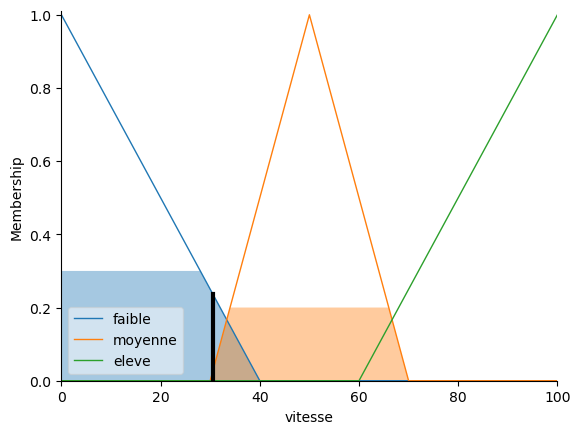

In [7]:
# Système de contrôle
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
vitesse_sim = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Entrée : température = 17°C
vitesse_sim.input['temperature'] = 17
vitesse_sim.compute()

print(f"Pour une température de 17°C : vitesse = {vitesse_sim.output['vitesse']:.2f}")
vitesse.view(sim=vitesse_sim)